In [5]:
import tweepy
import webbrowser
import time
import re
from myconfig import *
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk import download
from textblob import TextBlob
import numpy as np
import pandas as pd
import seaborn as sb

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk import download
import matplotlib.pyplot as plt

In [2]:
#Twitter class for fetching tweets

class TwitterClient(object):
    def __init__(self):
        try:
            self.auth = tweepy.OAuthHandler(twitterApiKey,twitterApiKeySecret)
            self.auth.set_access_token(twitterAccessToken,twitterAccessTokenSecret)
            self.api = tweepy.API(self.auth)
            assert self.api
        except:
            print("Error: Authentication Failed")
    
    def clean_tweet(self, tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
    
    def get_tweet_sentiment(self, tweet):
        # create TextBlob object of passed tweet text
        analysis = TextBlob(self.clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
    
    def get_tweets(self, query, count = 10):
        tweets = []
        try:
            fetched_tweets = self.api.search_tweets(q = query, count = count)
            for tweet in fetched_tweets:
                '''
                all_english = True
                for c in tweet.text:
                    if ord(c) >= 256:
                        all_english = False
                        break
                if not all_english:
                    continue
                '''
                parsed_tweet = {}
                parsed_tweet['text'] = tweet.text
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)
                if tweet.retweet_count > 0:
                    if parsed_tweet not in tweets:
                        tweets.append(parsed_tweet)
                else:
                    tweets.append(parsed_tweet)
            return tweets
        except tweepy.TweepyException as e:
            print("Error : " + str(e))

    def fetch_tweets(self, query, count = 10):
        try:
            return self.api.search_tweets(q = query, count = count)
        except tweepy.TweepyException as e:
            print("Error : " + str(e))
            

In [40]:
tc = TwitterClient()
tweets = tc.get_tweets(query = 'FarmLaws', count = 10000)
# picking positive tweets from tweets
ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
# percentage of positive tweets
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
# picking negative tweets from tweets
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
# picking neutral tweets from tweets

neutweets = [tweet for tweet in tweets if tweet['sentiment'] == 'neutral']

# percentage of negative tweets
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
# percentage of neutral tweets
print("Neutral tweets percentage: {} % \
    ".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))
# printing first 5 positive tweets
print("\n\nPositive tweets:")
for tweet in ptweets[:10]:
    print(tweet['text'])
  
 # printing first 5 negative tweets
print("\n\nNegative tweets:")
for tweet in ntweets[:10]:
    print(tweet['text'])
    
# printing first 5 neutral tweets
print("\n\nNeutral tweets:")
for tweet in neutweets[:10]:
    print(tweet['text'])

Positive tweets percentage: 16.417910447761194 %
Negative tweets percentage: 2.985074626865672 %
Neutral tweets percentage: 80.59701492537313 %     


Positive tweets:
RT @Newsbox_India: We will shut this country if Modi sells more things to Ambani and Adani : Farmer Leader Balbir Singh Rajewal.
#FarmLaws…
RT @Trendsetting123: @ANI 1) Dear PM @narendramodi Ji

Inspite of your assurances that your Govt is ready to debate all issue IN PARLIAMENT…
RT @SINGHDALIP: Story of the families of Punjab who lost their loved ones during farm agitation. BBC Journalist Ragvendra Rao's report @rag…
RT @ankurvashi1983: Middle Men Out: Govt coming up with unique ID's for Farmers with proper e-KYF (Know your Farmer) so as to enable hassle…
RT @AbpGanga: LIVE | #BaatToChubhegi : लड़ाई अभी बाकी है या विजयी हो गई है इसमेंं ? इस सवाल पे क्या जवाब दिया @RakeshTikaitBKU ने

देखिए @S…
RT @SangathanKisan: #YogiAdityanath ji public wants to know, when #SIT also proved it, then why delay in justice to the family o

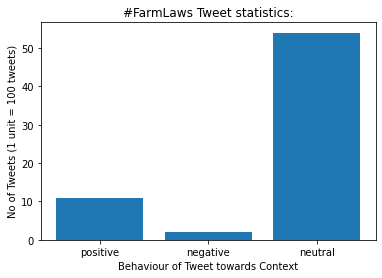

In [41]:
names = ['positive','negative','neutral']
values = [len(ptweets),len(ntweets),len(neutweets)]
plt.bar(names,values)
plt.xlabel('Behaviour of Tweet towards Context')
plt.ylabel('No of Tweets (1 unit = 100 tweets)')
plt.title('#FarmLaws Tweet statistics:')
plt.savefig('#FarmLaws.jpg',format='jpg')